### Chapter 4

This chapter covers
* Forms of machine learning beyond classification and regression
* Formal evaluation procedures for machine learning models
* Preparing data for deep learning
* Feature engineering
* Tackling overfitting
* The universal workflow for approaching machine learning problems

### Classification and regression glossary

* **Sample or input**—One data point that goes into our model.
* **Prediction or output**—What comes out of our model.
* **Target**—The truth. What our model should ideally have predicted, according to an external source of data.
* **Prediction error or loss value**—A measure of the distance between our model’s prediction and the target.
* **Classes**—A set of possible labels to choose from in a classification problem. For example, when classifying **cat** and **dog** pictures, **dog** and **cat** are the two classes.
* **Label**—A specific instance of a class annotation in a classification problem. For instance, if picture `#1234` is annotated as containing the class **dog**, then **dog** is a label of picture `#1234`.
* **Ground-truth or annotations**—All targets for a dataset, typically collected by humans.
* **Binary classification**—A classification task where each input sample should be categorized into two exclusive categories.
* **Multiclass classification**—A classification task where each input sample should be categorized into more than two categories: for instance, classifying handwritten digits.
* **Multilabel classification**—A classification task where each input sample can be assigned multiple labels. For instance, a given image may contain both a cat and a dog and should be annotated both with the **cat** label and the **dog** label. The number of labels per image is usually variable.
* **Scalar regression**—A task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.
* **Vector regression**—A task where the target is a set of continuous values: for example, a continuous vector. If we’re doing regression against multiple values (such as the coordinates of a bounding box in an image), then we’re doing vector regression.
* **Mini-batch or batch**—A small set of samples (typically between 8 and 128) that are processed simultaneously by the model. 
    * The number of samples is often a power of 2, to facilitate memory allocation on GPU.
    * When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model. 

### Goal of ML
In machine learning, the goal is to achieve models that **generalize**

### Training, validation, and test sets

Evaluating a model always boils down to splitting the available data into three sets:
1. training, 
2. validation, and 
3. test. 

We train on the training data and evaluate our model on the validation data. Once our model is ready for prime time, we test it one final time on the test data.

The reason is that developing a model always involves tuning its configuration: for example, choosing the number of layers or the size of the layers (called the **hyperparameters** of the model, to distinguish them from the **parameters**, which are the network’s weights).

We do this tuning by using as a feedback signal the performance of the model on the validation data. 
* In essence, this tuning is a form of **learning**: a search for a good configuration in some parameter space. 

As a result, tuning the configuration of the model based on its performance on the validation set can quickly result in overfitting to the validation set, even though our model is never directly trained on it.

Central to this phenomenon is the notion of **information leaks**. Every time we tune a **hyperparameter** of our model based on the model’s performance on the validation set, some information about the validation data leaks into the model. 

If we do this only once, **for one parameter**, then very few bits of information will leak, and our validation set will remain reliable to evaluate the model. But if we repeat this many times—running one experiment, evaluating on the validation set, and modifying our model as a result—then we’ll leak an increasingly significant amount of information about the validation set into the model

At the end of the day, we’ll end up with a model that performs artificially well on the validation data, because that’s what we optimized it for. 

We care about performance on completely new data, not the validation data, so we need to use a completely different, never-before-seen dataset to evaluate the model: **the test dataset**. 
* Our model shouldn’t have had access to any information about the test set, even indirectly.

If anything about the model has been tuned based on test set performance, then our measure of generalization will be flawed.
 
Splitting our data into training, validation, and test sets may seem straightforward, but there are a few advanced ways to do it that can come in handy when little data is available. Three classic evaluation recipes: 
* simple hold-out validation, 
* Kfold validation, and 
* iterated K-fold validation with shuffling.

### SIMPLE HOLD-OUT VALIDATION

Set apart some fraction of our data as our test set. Train on the remaining data, and evaluate on the test set.

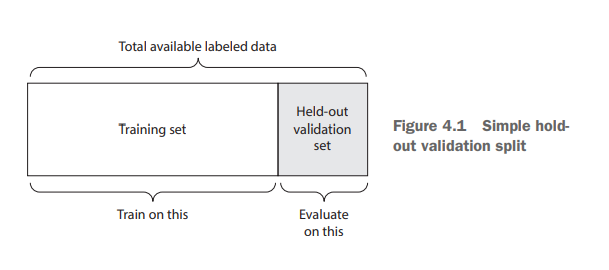

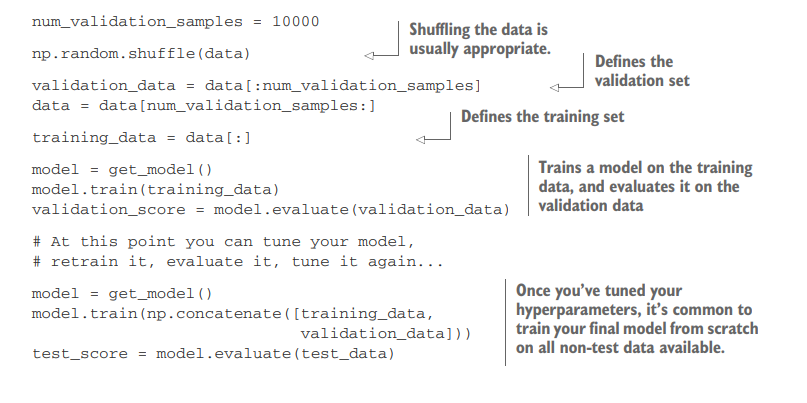

This is the simplest evaluation protocol, and it suffers from one flaw: 
* If little data is available, then our validation and test sets may contain too few samples to be statistically representative of the data at hand. 
* This is easy to recognize: if different random shuffling rounds of the data before splitting end up yielding very different measures of model performance, then we’re having this issue. 
    * K-fold validation and iterated K-fold validation are two ways to address this. 

### K-FOLD VALIDATION

With this approach, we split our data into **K partitions of equal size**. For each partition **i**, train a model on the remaining **K – 1** partitions, and evaluate it on partition **i**

Or final score is then the **averages of the K scores obtained**. This method is helpful
when the performance of our model shows significant variance based on our train-test split. 

Like hold-out validation, this method doesn’t exempt us from using a distinct validation set for model calibration.

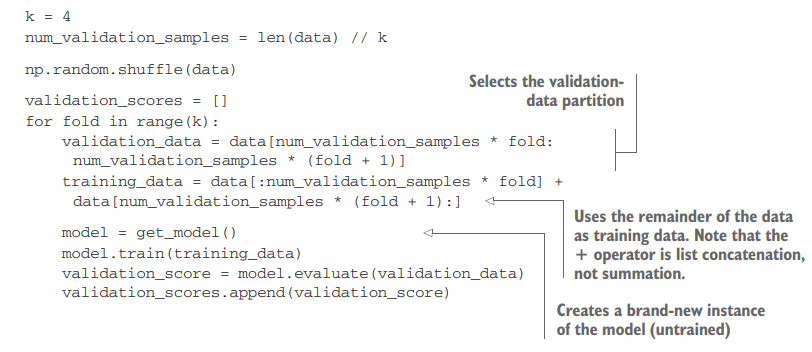

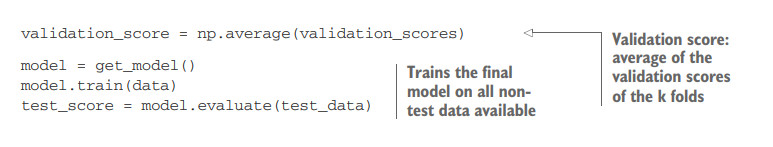

### ITERATED K-FOLD VALIDATION WITH SHUFFLING

This one is for situations in which we have relatively little data available and we need
to evaluate our model as precisely as possible. 

We’ve found it to be extremely helpful in Kaggle competitions. It consists of applying K-fold validation multiple times, shuffling the data every time before splitting it **K** ways. The final score is the average of the scores obtained at each run of K-fold validation. 

Note that we end up training and evaluating **P × K models** (where **P** is the number of iterations we use), which can very expensive. 

### Things to keep in mind

Keep an eye out for the following when we’re choosing an evaluation protocol:

* **Data representativeness**—We want both our training set and test set to be representative of the data at hand. For instance, if we’re trying to classify images of digits, and we’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as  our training set and the remaining 20% as our test set will result in our training set containing only classes 0–7, whereas our test set contains only classes 8–9. This seems like a ridiculous mistake, but it’s surprisingly common. For this reason, we usually should randomly shuffle our data before splitting it into training and test sets.
* **The arrow of time**—If we’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), we should not randomly shuffle our data before splitting it, because doing so will create a *temporal leak*: 
    * Our model will effectively be trained on data from the future. 
In such situations, we should always make sure all data in our test set is posterior to the data in the training set.
* **Redundancy in our data**—If some data points in our data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, we’ll be testing on part of our training data, which is the worst thing we can do! Make sure our training set and validation set are disjoint. 

### Data preprocessing for Neural Networks

Data preprocessing aims at making the raw data at hand more amenable to neural networks. This includes 
* vectorization, 
* normalization, 
* handling missing values, and
* feature extraction

### VECTORIZATION

All inputs and targets in a neural network must be tensors of floating-point data (or, in specific cases, tensors of integers). Whatever data we need to process for instance
* sound, 
* images, 
* text
* etc

We must first turn into tensors, a step called **data vectorization**. For instance, 
* In the two previous text-classification examples, we started from text represented as lists of integers (standing for sequences of words), and we used **one-hot encoding** to turn them into a tensor of **float32** data. 
* In the examples of classifying digits and predicting house prices, the data already came in vectorized form, so we were able to skip this step.

### VALUE NORMALIZATION

In general, it isn’t safe to feed into a neural network data that takes relatively large values (for example,
* **Multidigit integers**, which are much larger than the initial values taken by the weights of a network or 
* **Data that is heterogeneous** (for example, data where one feature is in the range `0–1` and another is in the range `100–200`). 

Doing so can trigger large gradient updates that will prevent the network from converging. To make learning easier for our network, our data should have the following characteristics:

* `Take small values`—Typically, most values should be in the 0–1 range.
* `Be homogenous`—That is, all features should take values in roughly the same range.

Additionally, the following stricter normalization practice is common and can help, although it isn’t always necessary (for example, we didn’t do this in the digit-classification example):
* Normalize each feature independently to have a mean of 0.
* Normalize each feature independently to have a standard deviation of 1.

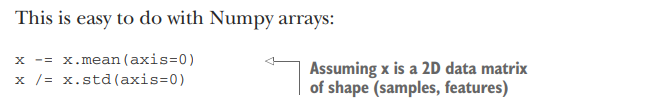

### HANDLING MISSING VALUES

In general, with neural networks, it’s safe to input missing values as 0, with the condition that 0 isn’t already a meaningful value. The network will learn from exposure to the data that the value 0 means missing data and will start ignoring the value.
 
Note that if we’re expecting missing values in the test data, but the network was trained on data without any missing values, the network won’t have learned to ignore missing values! In this situation, we should artificially generate training samples with missing entries: 
 * copy some training samples several times, and drop some of the features that we expect are likely to be missing in the test data. 

### Feature engineering

**Feature engineering** is the process of using our own knowledge about the data and about the machine-learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (nonlearned) transformations to the data before it goes into the model. 

In many cases, it isn’t reasonable to expect a machine learning model to be able to learn from completely arbitrary data. The data needs to be presented to the model in a way that will make the model’s job easier.

Suppose we’re trying to develop a model that can take as input an image of a clock and can output the time of day 

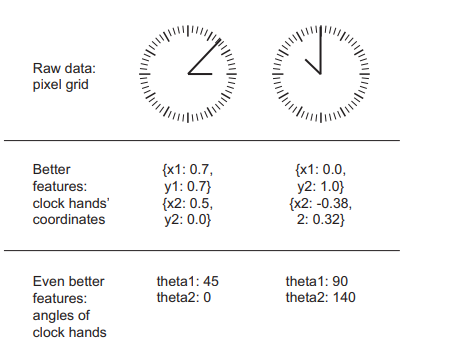

If we choose to use the raw pixels of the image as input data, then we have a difficult machine-learning problem on  our hands. 
* We’ll need a convolutional neural network to solve it, and we’ll have to expend quite a bit of computational resources to train the network.

But if we already understand the problem at a high level (we understand how humans read time on a clock face), then we can come up with much better input features for a machine-learning algorithm: for instance, 
* It’s easy to write a five-line Python script to follow the black pixels of the clock hands and output the (x, y) coordinates of the tip of each hand. 
* Then a simple machine-learning algorithm can learn to associate these coordinates with the appropriate time of day.

We can go even further: do a coordinate change, and express the (x, y) coordinates as polar coordinates with regard to the center of the image. 
* Our input will become the angle theta of each clock hand. At this point, our features are making the problem so easy that no machine learning is required; a simple rounding operation and dictionary lookup are enough to recover the approximate time of day.

That’s the essence of feature engineering: making a problem easier by expressing it in a simpler way. It usually requires understanding the problem in depth.

Before deep learning, feature engineering used to be critical, because **classical shallow algorithms** didn’t have hypothesis spaces rich enough to learn useful features by themselves.

Fortunately, modern deep learning removes the need for most feature engineering, because neural networks are capable of automatically extracting useful features from raw data. 
* Does this mean we don’t have to worry about feature engineering as long as we’re using deep neural networks? No, for two reasons:
    * Good features still allow us to solve problems more elegantly while using fewer resources. For instance, it would be ridiculous to solve the problem of reading a clock face using a convolutional neural network.
    * Good features let us solve a problem with far less data. The ability of deeplearning models to learn features on their own relies on having lots of training data available; if we have only a few samples, then the information value in their features becomes critical. 

### Overfitting and Underfitting

In all three examples in the previous chapter
* predicting movie reviews, 
* topic classification, and 
* house-price regression

The performance of the model on the held-out validation data always peaked after a few epochs and then began to degrade: 
* the model quickly started to overfit to the training data.

Overfitting happens in every machine-learning problem. Learning how to deal with overfitting is essential to mastering machine learning.
 
The fundamental issue in machine learning is the tension between **optimization** and **generalization**. 
* **Optimization** refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning) 
* **Generalization** refers to how well the trained model performs on data it has never seen before. 

The goal of the game is to get good generalization, of course, but we don’t control generalization; we can only adjust the model based on its training data.

At the beginning of training, **optimization** and **generalization** are correlated: 
* the lower the loss on training data, the lower the loss on test data. 

While this is happening, our model is said to be **underfit**: 
* there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. 

But after a certain number of iterations on the training data, **generalization** stops improving, and validation metrics stall and then begin to degrade: 
* the model is starting to **overfit**. 
* That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.
 
To prevent a model from learning misleading or irrelevant patterns found in the training data, 
* the best solution is to get more training data. A model trained on more data will naturally generalize better. 
* When that isn’t possible, the next-best solution is to modulate the quantity of information that our model is allowed to store or to add constraints on what information it’s allowed to store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.
 
The processing of **fighting overfitting** this way is called **regularization**.

# Techniques of Regularization

1. Reducing the network’s size
2. Adding weight regularization
3. Adding dropout

### 1. Reducing the network’s size

The simplest way to prevent overfitting is to reduce the size of the model: the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer). 

In deep learning, the number of learnable parameters in a model is often referred to as the **model’s capacity**. Intuitively, a model with more parameters has more memorization capacity and therefore can easily learn a perfect dictionary-like mapping between training samples and their targets—a mapping without any generalization power.

Always keep this in mind: deeplearning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it won’t be able to learn this mapping as easily; thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets—precisely the type of representations we’re interested in. 

At the same time, keep in mind that we should use models that have enough parameters that they
don’t **underfit**: our model shouldn’t be starved for memorization resources. There is a compromise to be found between too much capacity and not enough capacity.
 
 
Unfortunately, there is no magical formula to determine the right number of layers or the right size for each layer. We must evaluate an array of different architectures (on our validation set, not on our test set, of course) in order to find the correct model size for our data. 

The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until we see diminishing returns with regard to validation loss.

Let’s try this on the movie-review classification network. 

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
# Original model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
# Version of the model with lower capacity

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

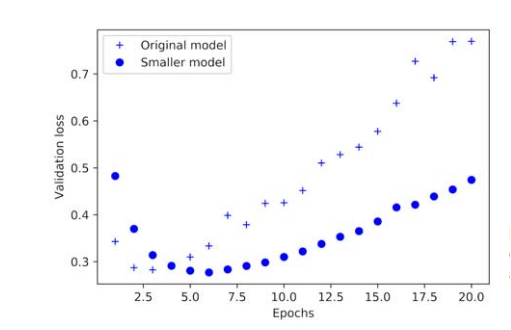

Above figure shows a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of the smaller network, and the crosses are the initial network (remember, a lower validation loss signals a better model).

As we can see, the smaller network starts overfitting later than the reference network (after six epochs rather than four), and its performance degrades more slowly once it starts overfitting.
 
Now, for kicks, let’s add to this benchmark a network that has much more capacity—far more than the problem warrants.

In [4]:
# Version of the model with higher capacity

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

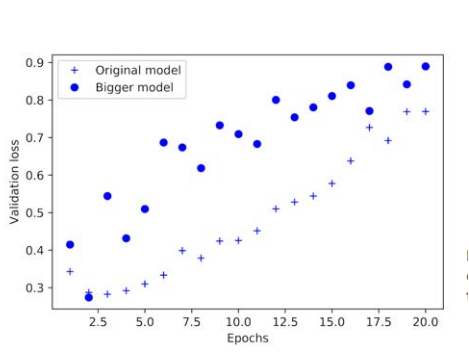

Above figure shows how the bigger network fares compared to the reference network. The dots are the validation loss values of the bigger network, and the crosses are the initial network.

The bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severely. Its validation loss is also noisier.

Meanwhile, figure below shows the training losses for the two networks. As we can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

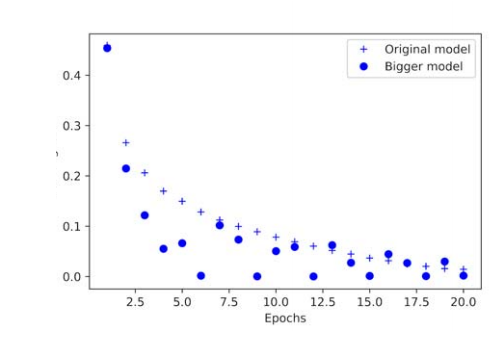

### Adding Weight Regularization

We may be familiar with the principle of **Occam’s razor**: 
* Given two explanations for something, the explanation most likely to be correct is the simplest one—the one that makes fewer assumptions. 

This idea also applies to the models learned by neural networks: 
* Given some training data and a network architecture, multiple sets of weight values (multiple models) could explain the data. 
* Simpler models are less likely to overfit than complex ones.

A *simple model* in this context is a model where the distribution of parameter values has less  entropy (or a model with fewer parameters). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more **regular**. 

This is called **weight regularization**, and it’s done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
* **L1 regularization**—The **cost added** is proportional to the a**bsolute value of the weight** coefficients (the L1 norm of the weights).
* **L2 regularization**—The **cost added** is proportional to the **square of the value of the weight** coefficients (the L2 norm of the weights). 
    * L2 regularization is also called **weight decay** in the context of neural networks. 
    * Don’t let the different name confuse us: **weight decay** is mathematically the same as **L2 regularization**.

In Tensorflow/Keras, **weight regularization** is added by passing weight regularizer instances to layers as keyword arguments. 

Let’s add **L2 weight regularization** to the movie-review classification network.

In [5]:
# Adding L2 weight regularization to the model

from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', 
                       input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

`l2(0.001)` means every coefficient in the weight matrix of the layer **will add** `0.001 x weight_coefficient_value` to the **total loss** of the network. 
* Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

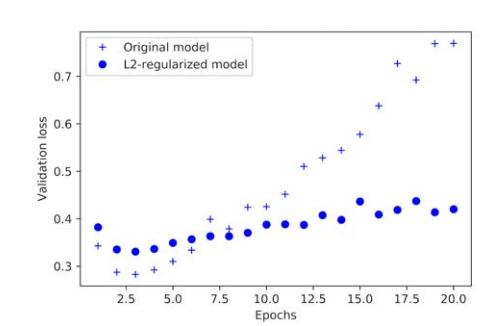

Figure above shows the impact of the L2 regularization penalty. As we can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.

As an **alternative to L2 regularization**, we can use one of the following Tensorflow/Keras weight regularizers.

In [9]:
#  Different weight regularizers available in Tensorflow/Keras

from tensorflow.keras import regularizers

regularizers.l1(0.001) # L1 regularization
regularizers.l1_l2(l1=0.001, l2=0.001) # Simultaneously L1 and L2 regularization

### Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, **developed by Geoff Hinton and his students at the University of Toronto**. 

Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. 
* Let’s say a given layer would normally return a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, `[0, 0.5, 1.3, 0, 1.1]`. 

The dropout rate is the fraction of the features that are zeroed out; it’s **usually set between 0.2 and 0.5**. 
* At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

Consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we zero out at random a fraction of the values in the matrix:

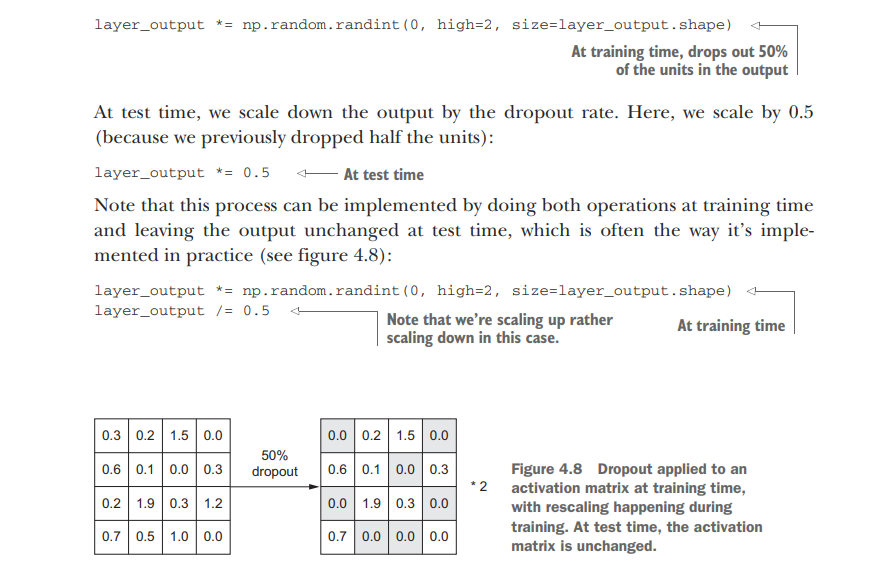

In [10]:
# import numpy as np

# np.random.randint(low = 0,high = 4,size = 8)

array([1, 1, 2, 1, 2, 1, 3, 1])

This technique may seem strange and arbitrary. Why would this help reduce overfitting? 

Hinton says he was inspired by, among other things, a fraud-prevention mechanism used by banks. In his own words;

*I went to my bank. The tellers kept changing and I asked one of them why.He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.*


The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren’t significant (what Hinton refers to as conspiracies), which the network will start memorizing if no noise is present.

In Keras, we can introduce dropout in a network via the Dropout layer, which is applied to the output of the layer right before it:

`model.add(layers.Dropout(0.5))`

Let’s add two Dropout layers in the IMDB network to see how well they do at reducing overfitting.

In [50]:
# Adding dropout to the IMDB network

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Figure below shows a plot of the results. Again, this is a clear improvement over the reference network

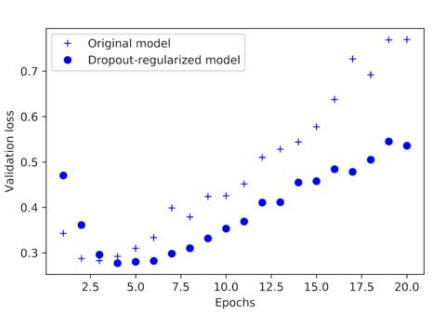

To recap, these are the most common ways to prevent overfitting in neural networks:
* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout

### Defining the problem and assembling a dataset

Keep in mind that machine learning can only be used to memorize patterns that are present in our training data. We can only recognize what we’ve seen before. Using machine learning trained on past data to predict the future is making the assumption that the future will behave like the past. That often isn’t the case.

### Choosing a measure of success

* For balanced-classification problems, where every class is equally likely, we can use 
    * accuracy and 
    * area under the receiver operating characteristic curve (ROC AUC). 
    
* For class-imbalanced problems, we can use 
    * precision and 
    * recall. 
    
* For ranking problems or multilabel classification, we can use 
    * mean average precision.
    
* And it isn’t uncommon to have to define our own custom metric by which to measure success. 

To get a sense of the diversity of machine-learning success metrics and how they relate to different problem domains, it’s helpful to browse the data science competitions on Kaggle (https://kaggle.com); they showcase a wide range of problems and evaluation metrics. 

### Deciding on an evaluation protocol

Once we know what we’re aiming for, we must establish how we’ll measure our current progress. We’ve previously reviewed three common evaluation protocols:

* `Maintaining a hold-out validation set`—The way to go when we have plenty of data
* `Doing K-fold cross-validation`—The right choice when we have too few samples for hold-out validation to be reliable
* `Doing iterated K-fold validation`—For performing highly accurate model evaluation when little data is available

Just pick one of these. In most cases, the first will work well enough

### Preparing a data

Once we know what we’re training on, what we’re optimizing for, and how to evaluate our approach, we’re almost ready to begin training models. But first, we should format our data in a way that can be fed into a machine-learning model—here, we’ll assume a deep neural network:

* Our data should be formatted as tensors.
* The values taken by these tensors should usually be scaled to small values: for example, in the `[-1, 1]` range or `[0, 1]` range.
* If different features take values in different ranges (heterogeneous data), then the data should be normalized.
* We may want to do some feature engineering, especially for small-data problems.

Once our tensors of input data and target data are ready, we can begin to train models

### Developing a model that does better than a baseline

Our goal at this stage is to achieve **statistical power**: that is, to develop a small model that is capable of beating a dumb baseline.

Note that it’s not always possible to achieve statistical power. If we can’t beat a random baseline after trying multiple reasonable architectures, it may be that the answer to the question we’re asking isn’t present in the input data. Remember that we make two hypotheses:

* We hypothesize that our outputs can be predicted given our inputs.
* We hypothesize that the available data is sufficiently informative to learn the relationship between inputs and outputs.

It may well be that these hypotheses are false, in which case we must go back to the drawing board

Assuming that things go well, we need to make three key choices to build our first working model:

* **Last-layer activation**—This establishes useful constraints on the network’s output. For instance, 
    * IMDB classification example used **sigmoid** in the last layer; 
    * Regression example didn’t use any last-layer activation; and so on.
   
* **Loss function**—This should match the type of problem we’re trying to solve. For instance,
    * IMDB example used **binary_crossentropy**, 
    * Regression example used **mse**, and so on.

* **Optimization configuration**—What optimizer will we use? What will its learning rate be? In most cases, it’s safe to go with **rmsprop** and its default learning rate.

**Loss functions**, after all, need to be computable given only a **mini-batch of data** (ideally, a loss function should be computable for as little as a single data point) and must be differentiable (otherwise, we can’t use backpropagation to train our network). 

For instance, the widely used classification metric `ROC AUC` can’t be directly optimized. Hence, in classification tasks, it’s common to optimize for a proxy metric of `ROC AUC`, such as **crossentropy**. 

In general, we can hope that the lower the crossentropy gets, the higher the `ROC AUC` will be.

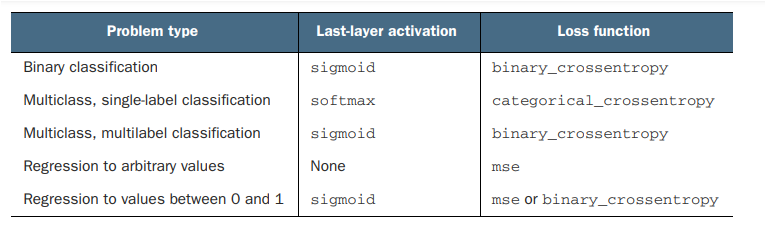

### Scaling up: developing a model that overfits

Once we’ve obtained a model that has statistical power, the question becomes, 
* Is our model sufficiently powerful? 
* Does it have enough layers and parameters to properly model the problem at hand? 

For instance, a network with a single hidden layer with two units would have statistical power on MNIST but wouldn’t be sufficient to solve the problem well. 

Remember that the universal tension in machine learning is between **optimization** and **generalization**; the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. 

To figure out where this border lies, first we must cross it. To figure out how big a model we’ll need, we must develop a model that overfits. This is fairly easy:

1. Add layers.
2. Make the layers bigger.
3. Train for more epochs.

Always **monitor the training loss and validation loss, as well as the training and validation values for any metrics** we care about. 

When we see that the model’s performance on the validation data begins to degrade, we’ve achieved overfitting. The next stage is to start regularizing and tuning the model, to get as close as possible to the ideal model that neither underfits nor overfits. 

### Regularizing our model and tuning our hyperparameters

This step will take the most time: we’ll repeatedly 
1. Modify our model, 
2. Train it, 
3. Evaluate on our validation data (not the test data, at this point), 
4. Modify it again, and
5. Repeat, until the model is as good as it can get. 

These are some things we should try;

* Add dropout.
* Try different architectures: add or remove layers.
* Add L1 and/or L2 regularization.
* Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
* Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.

Be mindful of the following:

* Every time we use feedback from our validation process to tune our model, we leak information about the validation process into the model.
* Repeated just a few times, this is innocuous; but done systematically over many iterations, it will eventually cause our model to overfit to the validation process (even though no model is directly trained on any of the validation data). This makes the evaluation process less reliable.
* Once we’ve developed a satisfactory model configuration, we can train our final production model on all the available data (training and validation) and evaluate it one last time on the test set. 
* If it turns out that performance on the test set is significantly worse than the performance measured on the validation data, this may mean either that our validation procedure wasn’t reliable after all, or that we began overfitting to the validation data while tuning the parameters of the model. 
* In this case, we may want to switch to a more reliable evaluation protocol (such as iterated K-fold validation)

### Summary

* Define the problem at hand and the data on which we’ll train. Collect this data, or annotate it with labels if need be.
* Choose how we’ll measure success on our problem. Which metrics will we monitor on our validation data?
* Determine our evaluation protocol: 
    * hold-out validation? 
    * K-fold validation? 
    * Which portion of the data should we use for validation?
* Develop a first model that does better than a basic baseline: a model with statistical power.
* Develop a model that overfits.
* Regularize our model and tune its hyperparameters, based on performance on the validation data. A lot of machine-learning research tends to focus only on this step—but keep the big picture in mind.